In [1]:
import pandas as pd
import numpy as np


In [2]:
df= pd.read_csv('Twitter_Emotion_Dataset.csv') 


In [3]:
df.head()

,label,tweet
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu..."
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi..."
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng..."
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata..."


In [4]:
df.tail()

,label,tweet
4396,love,"Tahukah kamu, bahwa saat itu papa memejamkan m..."
4397,fear,Sulitnya menetapkan Calon Wapresnya Jokowi di ...
4398,anger,"5. masa depannya nggak jelas. lha iya, gimana ..."
4399,happy,[USERNAME] dulu beneran ada mahasiswa Teknik U...
4400,sadness,"Ya Allah, hanya Engkau yang mengetahui rasa sa..."


In [5]:
df["label"].value_counts()

anger      1101
happy      1017
sadness     997
fear        649
love        637
Name: label, dtype: int64

In [6]:
class_names = ['anger', 
    'happy',
    'sadness',
    'fear',
    'love'
 ]

In [7]:
encoding = {
    'anger': 0, 
    'happy' :1,
    'sadness':2,
    'fear':3,
    'love':4
 
}

In [8]:
text = df['tweet'].values.tolist()
emotion= df['label'].tolist()

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text , emotion, test_size=.2, random_state=42)

In [10]:
df["label"].value_counts()

anger      1101
happy      1017
sadness     997
fear        649
love        637
Name: label, dtype: int64

In [11]:
import ktrain
from ktrain import text
MODEL_NAME = 'cahya/bert-base-indonesian-522M'
t = text.Transformer(MODEL_NAME, maxlen=500)


In [12]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: id
train sequence lengths:
	mean : 29
	95percentile : 44
	99percentile : 49


Is Multi-Label? False
preprocessing test...
language: id
test sequence lengths:
	mean : 29
	95percentile : 44
	99percentile : 49


In [13]:
model = t.get_classifier()

In [14]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=6)

In [15]:
history = learner.fit_onecycle(2e-5, 5)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/5
587/587 [==============================] - 6322s 11s/step - loss: 1.2798 - accuracy: 0.4665 - val_loss: 1.0783 - val_accuracy: 0.5902
Epoch 2/5
587/587 [==============================] - 6261s 11s/step - loss: 0.8825 - accuracy: 0.6727 - val_loss: 0.9962 - val_accuracy: 0.6322
Epoch 3/5
587/587 [==============================] - 6350s 11s/step - loss: 0.5925 - accuracy: 0.7963 - val_loss: 0.9979 - val_accuracy: 0.6572
Epoch 4/5
587/587 [==============================] - 6418s 11s/step - loss: 0.2396 - accuracy: 0.9207 - val_loss: 1.1642 - val_accuracy: 0.6674
Epoch 5/5
587/587 [==============================] - 6348s 11s/step - loss: 0.0647 - accuracy: 0.9869 - val_loss: 1.2502 - val_accuracy: 0.6765


In [16]:
learner.validate(val_data=(val), class_names=class_names)

              precision    recall  f1-score   support

       anger       0.74      0.72      0.73       229
       happy       0.69      0.66      0.67       119
     sadness       0.70      0.69      0.69       214
        fear       0.79      0.74      0.76       119
        love       0.53      0.58      0.55       200

    accuracy                           0.68       881
   macro avg       0.69      0.68      0.68       881
weighted avg       0.68      0.68      0.68       881



array([[166,   8,  17,   1,  37],
       [ 10,  78,  11,   1,  19],
       [ 17,   7, 148,  10,  32],
       [  2,   2,  12,  88,  15],
       [ 30,  18,  24,  12, 116]], dtype=int64)

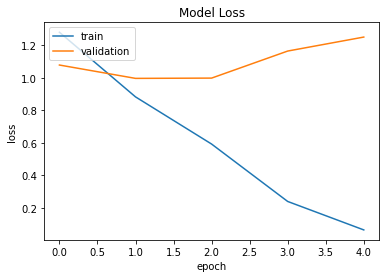

In [17]:
learner.plot('loss')